In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


test.csv
sample_submission.csv
train.csv


In [2]:
train = pd.read_csv("train.csv")
train.shape
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("test.csv")
test.shape

(28000, 784)

In [4]:
Y_train = train["label"]
X_train = train.drop(labels=["label"],axis = 1)

Text(0.5, 1.0, 'Number of digit classes')

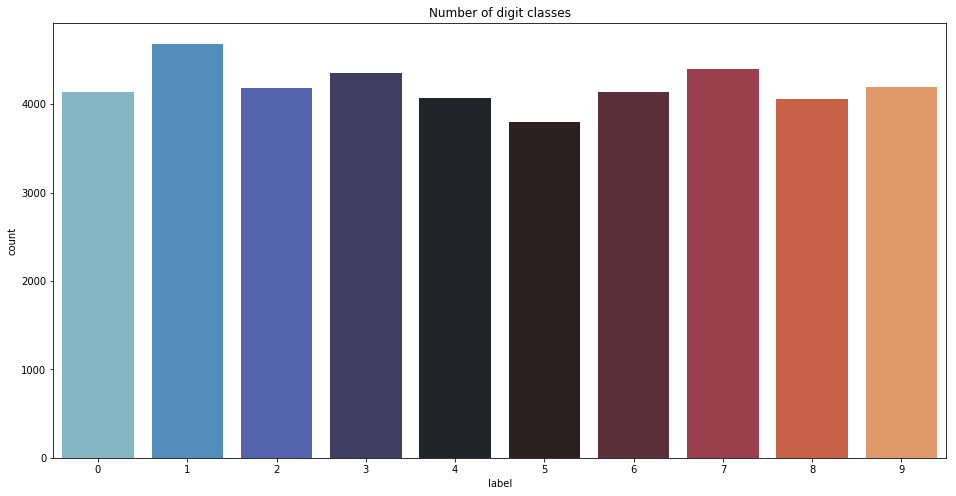

In [5]:
plt.figure(figsize = (16,8))
sns.countplot(Y_train, palette = "icefire")
plt.title("Number of digit classes")

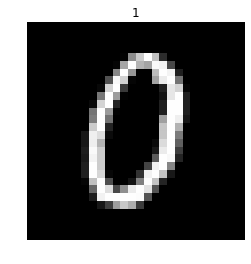

In [6]:
img = X_train.iloc[5].as_matrix()
img = img.reshape((28,28))
plt.imshow(img,cmap="gray")
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

In [7]:
# Normalize
X_train = X_train / 255.0
test = test / 255.0
X_train.shape,test.shape

((42000, 784), (28000, 784))

In [8]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
X_train.shape,test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [9]:
# Label encoding
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes= 10)

Using TensorFlow backend.


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)

In [11]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [12]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = "Same",
                 activation = "relu", input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = "Same",
                 activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [13]:
optimizer = Adam(lr = 0.001, beta_1=0.9, beta_2 = 0.999)

In [14]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy",metrics = ["accuracy"])

In [15]:
epochs = 10
batch_size = 250

In [16]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        rotation_range=0.5,  
        zoom_range = 0.5, 
        width_shift_range=0.5, 
        height_shift_range=0.5,
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [17]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 19s 127ms/step - loss: 2.1313 - accuracy: 0.2178 - val_loss: 1.5753 - val_accuracy: 0.5057
Epoch 2/10
151/151 [==============================] - 19s 127ms/step - loss: 1.8157 - accuracy: 0.3611 - val_loss: 0.9709 - val_accuracy: 0.7567
Epoch 3/10
151/151 [==============================] - 20s 130ms/step - loss: 1.6181 - accuracy: 0.4426 - val_loss: 0.6853 - val_accuracy: 0.8614
Epoch 4/10
151/151 [==============================] - 19s 126ms/step - loss: 1.4989 - accuracy: 0.4884 - val_loss: 0.5748 - val_accuracy: 0.8652
Epoch 5/10
151/151 [==============================] - 19s 125ms/step - loss: 1.4231 - accuracy: 0.5125 - val_loss: 0.4761 - val_accuracy: 0.8852
Epoch 6/10
151/151 [==============================] - 19s 129ms/step - loss: 1.3659 - accuracy: 0.5352 - val_loss: 0.3874 - val_accuracy: 0.9045
Epoch 7/10
151/151 [==============================] - 19s 126ms/step - loss: 1.3183 - accuracy: 0.5564 - val_loss: 0.3899 - val_ac

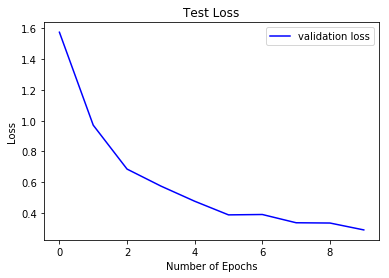

In [18]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()